<a href="https://colab.research.google.com/github/yuv2020/DL-Exp-/blob/main/Regression3_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:

import pandas as pd
data = pd.read_csv('train.csv')


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

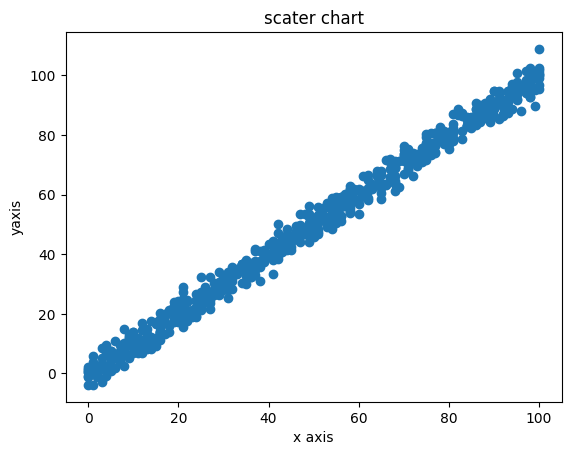

In [ ]:
import numpy as np
import  matplotlib.pyplot as py
py.scatter(data['x'],data['y'])
py.xlabel("x axis")
py.ylabel("yaxis")
py.title("scater chart")
py.show()

In [ ]:
x=data['x']
y=data['y']
print(x)
print(y)
n = np.size(x)
mx = np.mean(x)
my = np.mean(y)
SSxy = np.sum(y*x)-n*my*mx
SSxx = np.sum(x*x)-n*mx*mx
a=SSxy/SSxx
b=abs(a*mx)
print("cofficient independent=",a)
print("cofficient dependent =",b)

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
695    58.0
696    93.0
697    82.0
698    66.0
699    97.0
Name: x, Length: 700, dtype: float64
0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, Length: 700, dtype: float64
cofficient independent= 0.03227853377530875
cofficient dependent = 1.7748654923681473


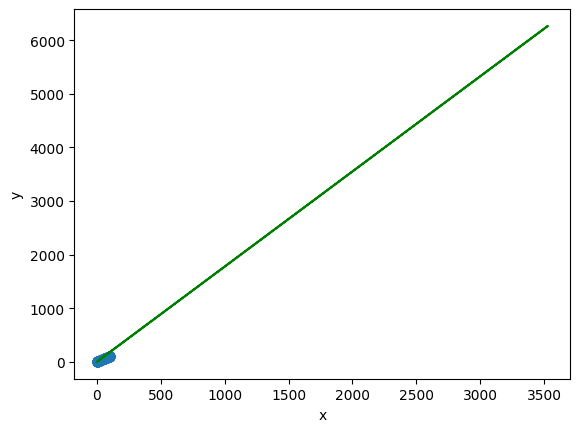

In [ ]:
py.scatter(x, y)
ypred = a + b*x
py.plot(x, ypred, color = "g")
py.xlabel('x')
py.ylabel('y')
py.show()

In [ ]:

k=int(input("enter value of x for pridection"))
ypridected=a+b*k
print(ypridected)


EXP 05
Implementation of RNN Algorithm


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



In [63]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [64]:
data = np.array(data, dtype=float)
target = np.array(target, dtype = float)

In [65]:
data.shape

(100, 5, 1)

In [43]:
target.shape

(100,)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 4)

In [70]:
model = Sequential()

In [71]:
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences = True))
model.add(LSTM((1), return_sequences = False))

In [72]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['accuracy'])

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 1)              12        
                                                                 
 lstm_6 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history = model.fit(x_train, y_train, epochs=400, validation_data = (x_test, y_test))


Epoch 1/400
3/3 [==============================] - 5s 488ms/step - loss: 56.6903 - accuracy: 0.0000e+00 - val_loss: 45.7509 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 34ms/step - loss: 56.6878 - accuracy: 0.0000e+00 - val_loss: 45.7484 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 21ms/step - loss: 56.6853 - accuracy: 0.0000e+00 - val_loss: 45.7459 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 21ms/step - loss: 56.6828 - accuracy: 0.0000e+00 - val_loss: 45.7434 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 23ms/step - loss: 56.6802 - accuracy: 0.0000e+00 - val_loss: 45.7408 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 21ms/step - loss: 56.6777 - accuracy: 0.0000e+00 - val_loss: 45.7382 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 32ms/step - loss: 56.6750 - accuracy: 0.0000e

In [75]:
result = model.predict(x_test)

1/1 [==============================] - 1s 831ms/step


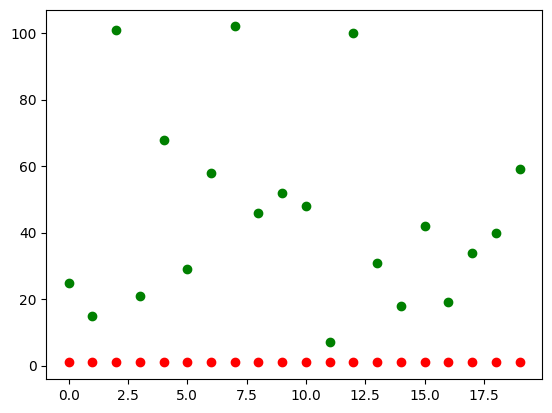

In [79]:
plt.scatter(range(20), result, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

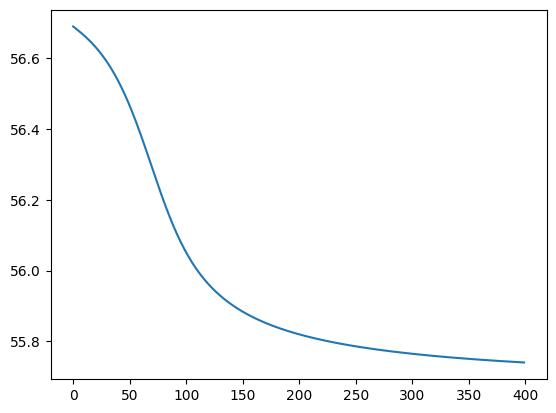

In [77]:
plt.plot(history.history['loss'])
plt.show()